# Erstellung von Graphiken mit Matplotlib

## Auftrag
Erstellen Sie eine Beispielsammlung von verschiedenen Arten von Graphiken mit Matplotlib; es sollte je ein Beispiel der folgenden Diagrammtypen berücksichtigt werden:
1. Funktionsgraphen, 
2. Mehrere Funktionsgraphen in der selben Graphik,
3. Balkendiagramme,
4. Tortendiagramme,
5. Histogramme.

## Umgebung
Damit die Snippets funktionieren, muss das folgende Python-Modul installiert sein.
* numpy
* matplotlib
* scipy

Die jeweilge Importe sind jeweils nur in den ersten Snippets aufgeführt, da die einzelnen Sippets aufeinander aufgaben.

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy

     |████████████████████████████████| 28.8 MB 14.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### NumPy
Bei **NumPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet **NumPy** effiziente Implementierungen von mathematischen Funktionen. 

###  Matplotlib
Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglich eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, dass sie für fast alle Anwendungsbereiche geeignet sind. 

### SciPy
Bei **SciPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht es einfach Statistische Standardwerte zu generieren und noch vieles mehr.

## Funktionsgraphen

### Einfacher Funktionsgraph
Für den Auftrag **1 Funktionsgraphen** wurde die Allgemeine Normalverteilung (Gauss-Verteilung) ausgewählt. Bei der Normalverteilung handelt es sich in der Statistik um eine der am häufigsten verwendeten Verteilungsfunktionen. Das kommt daher, dass sich mit dieser Funktion viele technische, wirtschaftliche und naturwissenschaftliche Abhängigkeiten beschreiben lassen. Die Normalverteilung besitzt die bekannte Glockenkurve welche über zwei Parameter $\mu$ (Mittelwerts) und $\sigma^2$ (Variaz) und $\sigma$ wäre die Wurzel aus der Varianz und ist die Standardabweichung.  

$$f(x;\mu,\sigma^2)=\frac{1}{\sigma\sqrt{2\pi}}*e^-\frac{1}{2}(\frac{x-\mu}{\sigma})^2$$  
Der Parameter $\mu$ (`mu`) gibt den Erwartungswert an. Dieser legt fest, an welcher Stelle die Normalvertilung ihr Maximum haben wird. Der zweite Parameter $\sigma$ (`sigma`) gibt die Standardabweichung an.
* $\mu$ verschiebt den Mittelwert auf der X-Achse
* $\sigma$ lässt die Glockenkurve stärker/schwächer ausfallen  

In [63]:
import scipy.stats


def normalPDF(x, mu, simga):
    """ Generiert eine Normalverteilung als Wahrscheinlichkeitsdichtefunktion
        :param array x: Normalverteite Daten
        :param float mu: Mittelwert
        :param float sigma: Standartabweichung
        :retrun x, y: Berechneten Daten für die X- und Y-Achse
    """
    
    y = scipy.stats.norm.pdf(x, mu, simga)
    return x, y

Die Funktion `normalPDF` generiert mithilfe der Programmbibliothek **SciPy** eine Normalverteilung. Wie auch die Normalverteilung benötigt die Funktion `normalPDF` zwei Parameter `mu` für die Bestimmung des Mittelwert und `sigma` für die Bestimmung der Standardabweichung respektive für die Varianz. Die Normalverteilung wird anhand der Daten erstellt die mittels dem Parameter `x` übergeben werden. 

Mittels **Matplotlib** ist es sehr einfach einen Funktionsgraph zu erstellen. Dazu wird nur der Import der Programmbibliothek und die zwei Zeilen `plt.plot(x, y)` und `plt.show()` benötigt. Wobei die Parameter `x`und `y` die entsprechenden Daten als Array vorhanden sein müssen. Diese Daten werden über die zuvor beschriebene Funktion `normalPDF` generiert. Der restliche Programmcode ist selbstprechend und ist dafür da um den Graph lesbarer und informationsreicher zu gestallten.
Folgende nicht vollständige Liste beschreibt, was alles für den Graphen konfiguriert werden kann. 
* `xlabel`: Wird die X-Achse beschrieben
* `ylabel`: Wird die Y-Achse beschrieben
* `title`: Wird ein Titel für den Graphen gesetzt
* `grid`: Wird festgelegt ob das Gitter im Hintergrund dargestellt werden soll   

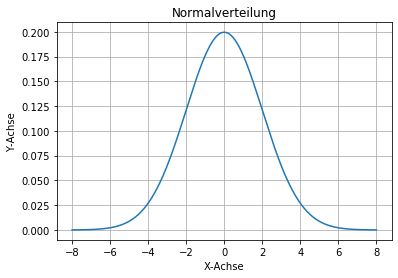

In [68]:
import matplotlib.pyplot as plt
import numpy as np


# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktion')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)

mu, sigma = 0.0, 2.0
x, y = normalPDF(x, mu, sigma)
plt.plot(x, y)

plt.show()

 ### Mehrere Funktionen in derselben Grafik
 Die Dahrstellung von mehreren Funktionen in derselben Grafik kann ebenfalls mit der `plot`-Funktion der **Matplotlib** erstellt werden. Dies durch mehrfaches Aufrufen der `plot`-Funktion mit den entsprechenden Parametern. Damit ersichtlich ist, welcher Graph welche Funktion abbildet, kann mittels der `legend`-Funktion eine Legende hinzugefügt werden.

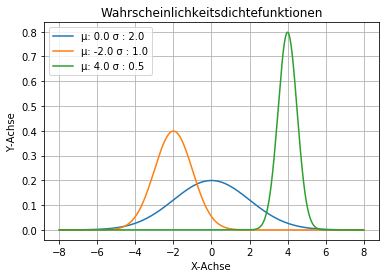

In [78]:
# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktionen')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)

mu_simga = [(0.0, 2.0), (-2.0, 1.0), (4.0, 0.5)]
for mu, sigma in mu_simga:
    x, y = normalPDF(x, mu, sigma)
    plt.plot(x, y, label=f'\u03BC: {mu} , \u03C3 : {sigma}')

plt.legend()
plt.show()

### Mehrere Funktionen in eigener Grafik als Subplot
Ähnlich wie bei einer Dahrstellung von mehreren Funktionen in derselben Grafik, können die Funktionen auch in eigenen Grafiken mit sogenannten Subplots dargestllt werden. Dazu kann vor dem Plotten mittels `subplot(row, column, index)` angegeben werden, aus wie vielen Zeilen (`row`) und Spalten (`column`) die Grafik besteht. Mittels dem dirtten Paramter `index` kann die genaue Stelle im Raster angegeben werden. Zusätzlich wurde die Farbe und Form der **Verteilungsfunktion** mit dem dritten Paramter `r-` definiert. Dabei steht `r` für die Farbe *red* und `-` für die Form. Für die Darstellung der Linen gibt es mehrere Formen. Anbei sind einige möglichkeiten aufgeführt.
* `r^`: Rote Dreiecke
* `g.`: Grüne Punkte
* `b+`: Blaue Dreiecke

Da nun die einzlenen Normalverteilungen in einzelnen Graphen dargestellt werden, wird zusätzlich ich den Graph noch die Verteilungsfunktion eingezeichnet. Die Verteilungsfunktikon wird über die Funktion `normalCDF` generiert. Diese Folgt dem gleichen Schema wie die `normalPDF`. Die Verteilungsfunktion beantwortet die Frage: "Mit welcher Wahrscheinlichkeit nimmt $X_N$ höchstens den Wert x an?". Die Verteilungsfunktion lautet für die Normalverteilung wie folgt.  
$$F_N(x|\mu,\sigma)=\int_{-\infty}^{x} \frac{1}{\sigma\sqrt{2\pi}}e^-\frac{1}{2}(\frac{u-\mu}{\sigma})^2$$

In [127]:
def normalCDF(x, mu, sigma):
    """  Generiert eine Normalverteilung als Verteilungsfunktion
        :param array x: Normalverteite Daten
        :param float mu: Mittelwert
        :param float sigma: Standartabweichung
        :retrun x, y: Berechneten Daten für die X- und Y-Achse
    """
    
    y = scipy.stats.norm.cdf(x, mu, sigma)
    return x, y 

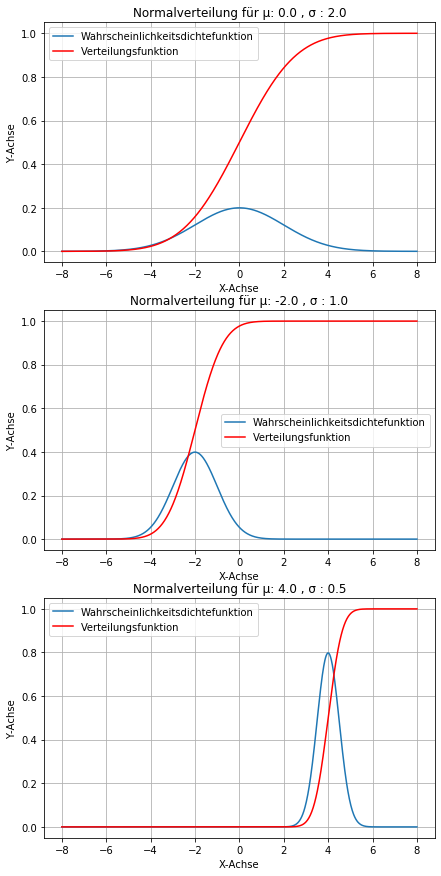

In [132]:
# Erstellt 1'000 Normalverteilte Daten zwsichen -8.0 und 8.0
x = np.linspace(-8.0, 8.0, 1000)

plt.figure(figsize=(7,15))

mu_simga = [(0.0, 2.0), (-2.0, 1.0), (4.0, 0.5)]
for i, values in enumerate(mu_simga, start=1):

    mu, sigma = values[0], values[1]

    plt.subplot(3, 1, i)
    plt.title(f'Normalverteilung für \u03BC: {mu} , \u03C3 : {sigma}')
    plt.xlabel('X-Achse')
    plt.ylabel('Y-Achse')
    plt.grid(True)
    
    x, y = normalPDF(x, mu, sigma)
    plt.plot(x, y, label='Wahrscheinlichkeitsdichtefunktion')
    x, y = normalCDF(x, mu, sigma)
    plt.plot(x, y, "r-", label=f'Verteilungsfunktion')
    plt.legend()
    

plt.show()

## Balkendiagramme
